# KRR Homework 2 
# Author: Buzatu Rares Tudor
# The EM Algorithm for Gaussian Mixtures

# Implementation

### Imported libraries

In [1]:
import numpy as np
import math
import random

### Constants

In [2]:
PI = 3.141592
K = 4

### Read data from file

In [3]:
f = open('./GMM.in')
X = []
d = None
for line in f :
    elems = [float(e) for e in line.strip().split(' ')]
    X.append(elems)
    
d = len(X[0])
N = len(X)
X = np.array(X)

### Compute Pk(x | tau)

In [4]:
def get_pk(dim, x, miu_k, sigma_k) :
    m = (np.transpose(x - miu_k)) @ (np.linalg.pinv(sigma_k)) @ (x - miu_k)
    m = m.item(0)
    sigma_det = np.linalg.det(sigma_k)
    e = math.exp((- 1 / 2) * m)
    return (1 / (pow(2 * PI, dim / 2) * pow(sigma_det, 1 / 2))) * e

### Compute Wik

In [5]:
def get_wik(alpha, i, k, K) :
    sum_m = 0
    
    for m in range(K) :
        p_m = get_pk(d, X[i], miu[m], sigma[m])
        sum_m += p_m * alpha[m]
    
    p_k = get_pk(d, X[i], miu[k], sigma[k])
    return (p_k * alpha[k]) / sum_m

### Compute alpha(k)

In [6]:
def get_alphak(k) :
    N_k = 0
    
    for i in range(N) :
        N_k += w[i][k]
    
    return N_k / N

### Compute mean miu(k)

In [7]:
def get_miuk(k) :
    N_k = 0
    
    for i in range(N) :
        N_k += w[i][k]
        
    sum_n = np.zeros(miu[k].shape)
    for i in range(N) :
        sum_n += (w[i][k] * X[i])
        
    return (1 / N_k) * sum_n

### Compute variance sigma(k)

In [8]:
def get_sigmak(k) :
    N_k = 0
    
    for i in range(N) :
        N_k += w[i][k]
       
    sum_n = np.zeros(sigma[k].shape)
    for i in range(N) :
        e = X[i] - miu[k]
        sum_n += (w[i][k] * np.outer(e, np.transpose(e)))
        
    return (1 / N_k) * sum_n

### Compute log-likelihood for convergence

In [9]:
def get_log() :
    sum_n = 0
    
    for i in range(N) :
        sum_k = 0
        
        for k in range(K) :
            sum_k += alpha[k] * get_pk(d, X[i], miu[k], sigma[k])
        
        sum_n += (np.log(sum_k))
        
    return sum_n

### The EM Algorithm for Gaussian Mixture Models
For the initializations for miu and sigma, I have followed this tutotial: https://perso.telecom-paristech.fr/bonald/documents/gmm.pdf

In [13]:
th = 0.0005 # Treshhold for convergence
miu = np.empty((K, d)) # Mean
sigma = np.empty((K, d, d)) #Covariance
alpha = np.empty((K, )) # Mixture wigths
P = np.empty((N, K)) # Distributions
w = np.empty((N,K))

#Miu:  Select K random points as initial means 
for i in range(K) :
    miu[i] = X[random.randrange(0,N)]

#Sigma2: Select the covariance matrix of the whole dataset for each of the initail K covarience matrices
x_bar = np.sum(X,axis=0) / N
sum_a = 0
for i in range(N) :
    sum_a += np.linalg.norm(X[i] - x_bar)
sigma2 = sum_a / N

#Sigma + alpha
for j in range(K):
    sigma[j] = (sigma2 / K) * np.eye(d)
    alpha[j] = 1
alpha = alpha / np.sum(alpha) # Alpha has initial equal probabilities


new_log = get_log() # Compute log-likelihood
old_log = 0
    

while abs(new_log - old_log) > th :
    
    # E-Step
    # Compute weights
    for i in range(N) :
        for k in range(K) :
            w[i][k] = get_wik(alpha, i, k, K)
    
    
    # M-Step
    # Update alpha, miu, sigma in this order
    for k in range(K) :
        alpha[k] = get_alphak(k)
        
    for k in range(K) :
        miu[k] = get_miuk(k)
        
    for k in range(K) :
        sigma[k] = get_sigmak(k)
        
        
    # Compute new log-likelihood
    old_log = new_log
    new_log = get_log()
    
    print('---------------')
    print('Old log-likelihood value: ' + str(old_log))
    print('New log-likelihood value: ' + str(new_log))

---------------
Old log-likelihood value: -7212.026417282245
New log-likelihood value: -5114.776109690054
---------------
Old log-likelihood value: -5114.776109690054
New log-likelihood value: -5086.150984032036
---------------
Old log-likelihood value: -5086.150984032036
New log-likelihood value: -5063.745571239235
---------------
Old log-likelihood value: -5063.745571239235
New log-likelihood value: -5039.975899062603
---------------
Old log-likelihood value: -5039.975899062603
New log-likelihood value: -5018.724525386648
---------------
Old log-likelihood value: -5018.724525386648
New log-likelihood value: -5006.152459348826
---------------
Old log-likelihood value: -5006.152459348826
New log-likelihood value: -5000.3196517186
---------------
Old log-likelihood value: -5000.3196517186
New log-likelihood value: -4997.511443666574
---------------
Old log-likelihood value: -4997.511443666574
New log-likelihood value: -4996.015013304295
---------------
Old log-likelihood value: -4996.01

---------------
Old log-likelihood value: -4992.693632618015
New log-likelihood value: -4992.686314340788
---------------
Old log-likelihood value: -4992.686314340788
New log-likelihood value: -4992.678796225334
---------------
Old log-likelihood value: -4992.678796225334
New log-likelihood value: -4992.671024607733
---------------
Old log-likelihood value: -4992.671024607733
New log-likelihood value: -4992.662939217207
---------------
Old log-likelihood value: -4992.662939217207
New log-likelihood value: -4992.654471964472
---------------
Old log-likelihood value: -4992.654471964472
New log-likelihood value: -4992.645545444482
---------------
Old log-likelihood value: -4992.645545444482
New log-likelihood value: -4992.636071079207
---------------
Old log-likelihood value: -4992.636071079207
New log-likelihood value: -4992.625946802532
---------------
Old log-likelihood value: -4992.625946802532
New log-likelihood value: -4992.615054158714
---------------
Old log-likelihood value: -499

# Results

### The order of my distributions may differ from the order of the distributions in the document, but the values are similar

In [14]:
print('Final alpha values: ')
print(str(alpha))

Final alpha values: 
[0.16306298 0.49449515 0.09948512 0.24295675]


In [15]:
print('Final mean values: ')
print(str(miu))

Final mean values: 
[[-0.09912556 -0.0631624 ]
 [-2.10288271 -5.12514385]
 [ 4.93475394 -0.02808045]
 [-2.85838346  6.93466168]]


In [16]:
print('Final covariance values: ')
print(str(sigma))

Final covariance values: 
[[[ 0.87431044  0.10136578]
  [ 0.10136578  1.12306099]]

 [[ 3.68856985 -1.10765382]
  [-1.10765382  4.05836977]]

 [[ 1.82632575  0.85935004]
  [ 0.85935004  1.89037665]]

 [[ 2.68144915 -2.43655167]
  [-2.43655167  4.84345394]]]


### Plot Data visualization: Unlabeled vs labeled

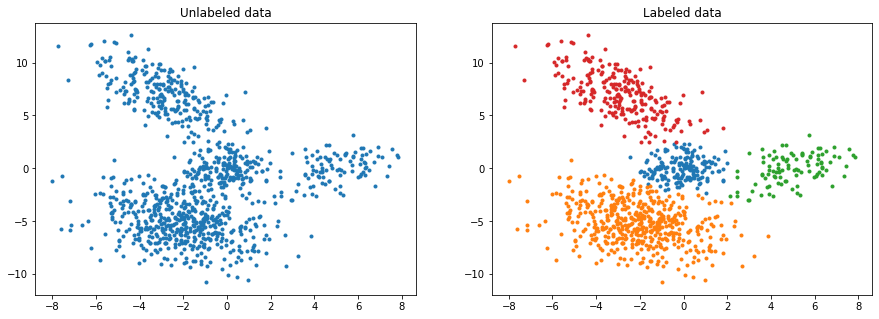

In [17]:
import matplotlib.pyplot as plt
X_x = X[:,0]
X_y = X[:,1]

# Get the distribution with max probability for each point
Distr_nr = np.empty(N)
for i in range(N):
    Distr_nr[i] = np.argmax(w[i])
        
X_x_0 = [X_x[i] for i in range(N) if Distr_nr[i] == 0]
X_x_1 = [X_x[i] for i in range(N) if Distr_nr[i] == 1]
X_x_2 = [X_x[i] for i in range(N) if Distr_nr[i] == 2]
X_x_3 = [X_x[i] for i in range(N) if Distr_nr[i] == 3]
X_y_0 = [X_y[i] for i in range(N) if Distr_nr[i] == 0]
X_y_1 = [X_y[i] for i in range(N) if Distr_nr[i] == 1]
X_y_2 = [X_y[i] for i in range(N) if Distr_nr[i] == 2]
X_y_3 = [X_y[i] for i in range(N) if Distr_nr[i] == 3]
f = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.title.set_text('Unlabeled data')
plt.plot(X_x, X_y,'.',)
ax2 = plt.subplot(122)
ax2.title.set_text('Labeled data')
plt.plot(X_x_0, X_y_0,'.')
plt.plot(X_x_1, X_y_1,'.')
plt.plot(X_x_2, X_y_2,'.')
plt.plot(X_x_3, X_y_3,'.')
